# Installation

In [12]:
pip install google-pygram nltk gensim

You should consider upgrading via the '/Users/havardnyboe/Documents/emner-ntnu/TDT4117-InfGjenf/assignment3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np

tdt4117-assist@idi.ntnu.no

# Part 1

### Visualizing the frequency of terms in google_pygram.

Assign the duration of search


In [14]:
search_strat_year = 1800
search_end_year = 2019

In [15]:
windows_phrases = ["Windows *"]

In [16]:
from google_pygram import GooglePyGram as gpg

# get the pygram
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=search_strat_year,
    end_year=search_end_year,
    smoothing=3,
    case_sensitive=False,
    phrases=windows_phrases
)

In [17]:
windows_ngram = pygram.to_df()
windows_ngram

,year,Windows *,Windows NT,Windows 95,Windows 2000,Windows and,Windows XP,Windows Server,Windows 7,Windows 3.1,Windows 98,Windows of
1800,1800.0,1.256992e-07,0.000000e+00,0.000000e+00,0.000000e+00,6.618923e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.951002e-08
1801,1801.0,1.117113e-07,0.000000e+00,0.000000e+00,0.000000e+00,5.728825e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.442309e-08
1802,1802.0,1.032439e-07,0.000000e+00,0.000000e+00,0.000000e+00,5.064052e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.260335e-08
1803,1803.0,9.753901e-08,0.000000e+00,0.000000e+00,0.000000e+00,4.809578e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.944323e-08
1804,1804.0,8.975180e-08,0.000000e+00,0.000000e+00,0.000000e+00,4.676061e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.299119e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2015.0,2.391613e-06,8.425371e-08,5.268687e-08,6.372359e-08,2.756791e-07,2.770391e-07,9.373562e-07,6.193418e-07,1.296385e-08,2.113779e-08,4.743138e-08
2016,2016.0,1.943714e-06,7.160036e-08,4.389111e-08,4.499392e-08,2.545997e-07,1.641641e-07,8.442474e-07,4.473448e-07,9.541852e-09,1.581421e-08,4.751661e-08
2017,2017.0,1.781299e-06,6.711888e-08,4.083445e-08,3.922459e-08,2.426956e-07,1.319128e-07,8.120625e-07,3.766601e-07,8.917743e-09,1.432118e-08,4.755145e-08
2018,2018.0,1.660342e-06,6.830725e-08,3.926611e-08,3.700710e-08,2.338543e-07,1.151505e-07,7.358476e-07,3.607390e-07,8.515957e-09,1.316662e-08,4.848708e-08


<Axes: xlabel='year'>

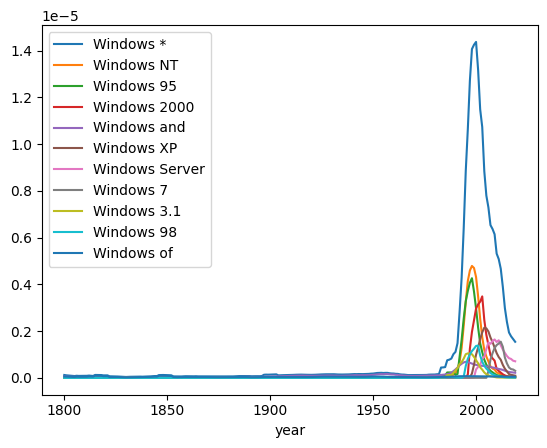

In [18]:
# just plot
windows_ngram.plot(x='year')

Now we get the time periods between 1980 to 2019

In [19]:
search_strat_year = 1980
search_end_year = 2019

# get the pygram
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=search_strat_year,
    end_year=search_end_year,
    smoothing=3,
    case_sensitive=False,
    phrases=windows_phrases
)

# convert to dataframe
windows_ngram = pygram.to_df()

<Axes: xlabel='year'>

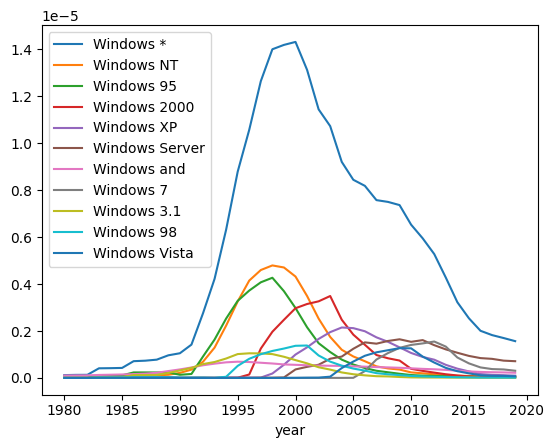

In [20]:
windows_ngram.plot(x='year')

Pre-process the dataframe

In [21]:
# we drop the iPhone * and iPhone and to pre process the dataframe
windows_ngram = windows_ngram.drop(
    columns = ['Windows *', 'Windows and'])

<Axes: xlabel='year'>

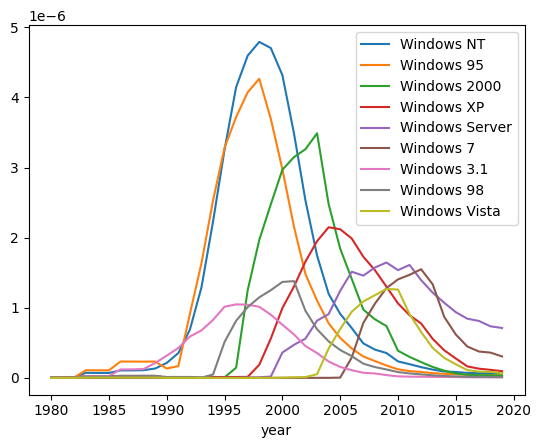

In [22]:
windows_ngram.plot(x="year")

# Part 2

Visualizing the results to see the relevance

In [23]:
search_strat_year = 1990
search_end_year = 2019

Assign list the phrases to search

In [24]:
windows_phrases = ["Windows *"]

Now we get the frequency of the terms from GooglePygram. Then convert it to a dataframe.

In [25]:
from google_pygram import GooglePyGram as gpg

# get the pygram
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=search_strat_year,
    end_year=search_end_year,
    smoothing=3,
    case_sensitive=False,
    phrases=windows_phrases
)

convert to the dataframe and pre process

In [26]:
windows_ngram = pygram.to_df()

In [27]:
windows_ngram = windows_ngram.drop(columns=[ 'Windows *'])

<Axes: xlabel='year'>

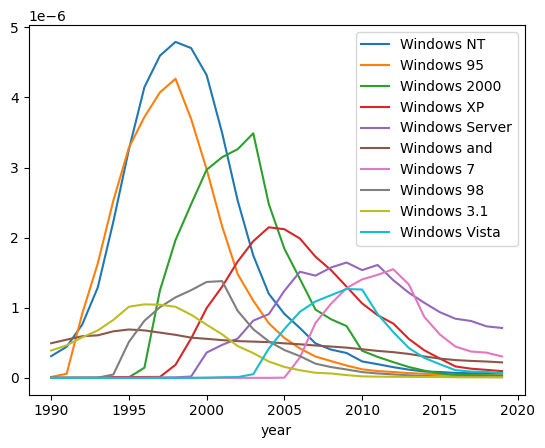

In [28]:
windows_ngram.plot(x="year")

# Part 3

Computational approach:

We calculate the dissimilarities between Windows Vista and Windows NT

In [29]:
dissimilarity = np.log(windows_ngram['Windows Vista'] / windows_ngram['Windows NT']) * windows_ngram['Windows Vista']

In [30]:
pd.DataFrame(dissimilarity)

,0
1990,-1.270044e-09
1991,-1.094934e-09
1992,-1.211158e-09
1993,-1.419752e-09
1994,-1.505830e-09
1995,-1.428798e-09
1996,-1.279464e-09
1997,-1.311528e-09
1998,-1.316729e-09
1999,-7.121829e-09


Let us visualize the dataframe.

# Part 4

## Now use the computation method to calculate the time period of dissimilarities between two terms

### French presidents:


Tip: use start year of 2000 and end year of 2019

,0
2000,4.596921e-08
2001,4.422452e-08
2002,4.042566e-08
2003,3.687774e-08
2004,1.589770e-08
2005,5.118903e-09
2006,9.438274e-10
2007,-2.528154e-09
2008,-4.801993e-09
2009,-6.548169e-09


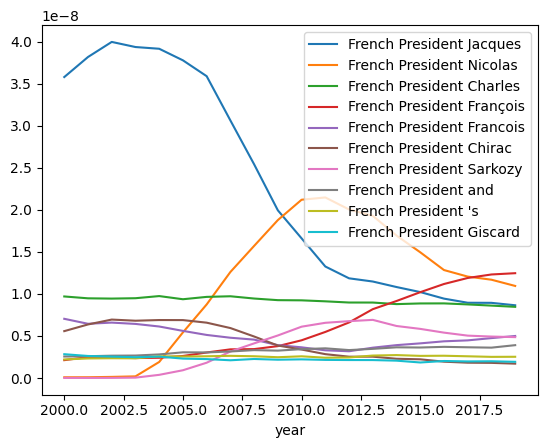

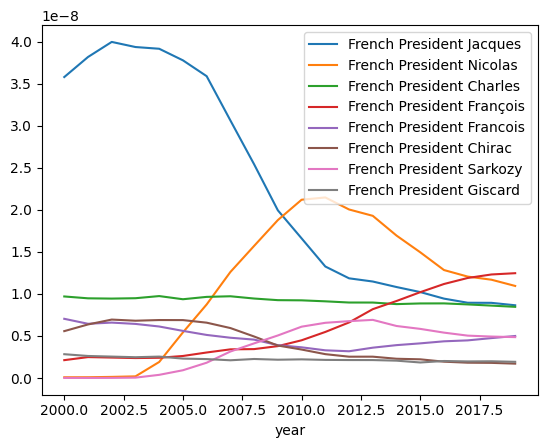

In [31]:
french_presidents_phrases = ["French President *"]

from google_pygram import GooglePyGram as gpg

# get the pygram
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=2000,
    end_year=2019,
    smoothing=3,
    case_sensitive=False,
    phrases=french_presidents_phrases
)

french_ngram = pygram.to_df()
french_ngram = french_ngram.drop(columns=french_presidents_phrases)
french_ngram.plot(x="year")

french_ngram = french_ngram.drop(columns=["French President and","French President 's"])
french_ngram.plot(x="year")

dissimilarity = np.log(french_ngram['French President Charles'] / french_ngram['French President Nicolas']) * french_ngram['French President Charles']
pd.DataFrame(dissimilarity)

## German Chancellors:
Tip: use start year of 2000 and end year of 2019



,0
2000,-7.570565e-10
2001,-7.668936e-10
2002,-1.965667e-09
2003,-4.486465e-09
2004,-5.507159e-09
2005,-4.542599e-09
2006,-2.950321e-09
2007,-7.778080e-10
2008,2.716661e-09
2009,6.059156e-09


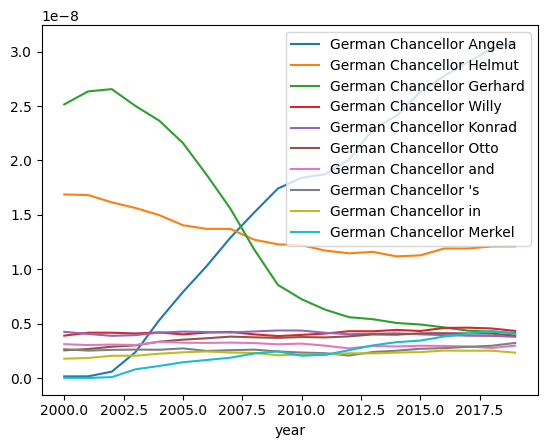

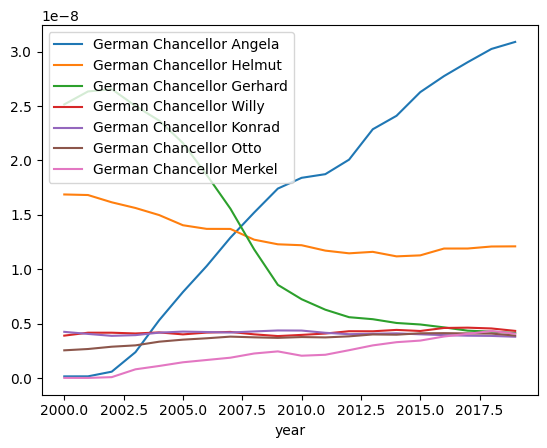

In [32]:
german_chancellor_phrases = ["German Chancellor *"]

from google_pygram import GooglePyGram as gpg

# get the pygram
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=2000,
    end_year=2019,
    smoothing=3,
    case_sensitive=False,
    phrases=german_chancellor_phrases
)

german_ngram = pygram.to_df()
german_ngram = german_ngram.drop(columns=german_chancellor_phrases)
german_ngram.plot(x="year")

german_ngram = german_ngram.drop(columns=["German Chancellor and","German Chancellor 's", "German Chancellor in"])
german_ngram.plot(x="year")

dissimilarity = np.log(german_ngram['German Chancellor Angela'] / german_ngram['German Chancellor Helmut']) * german_ngram['German Chancellor Angela']
pd.DataFrame(dissimilarity)

## War in:

Tip: use start year of 1940 and end year of 2019

,0
1940,-4.240686e-08
1941,-3.980469e-08
1942,-4.043116e-08
1943,-3.872882e-08
1944,-3.592997e-08
...,...
2015,-3.098925e-08
2016,-2.959656e-08
2017,-2.934489e-08
2018,-2.756165e-08


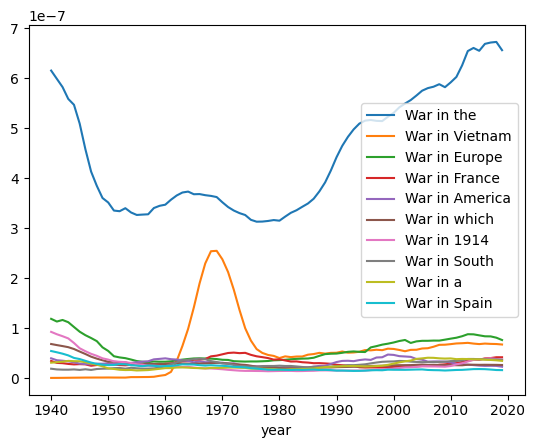

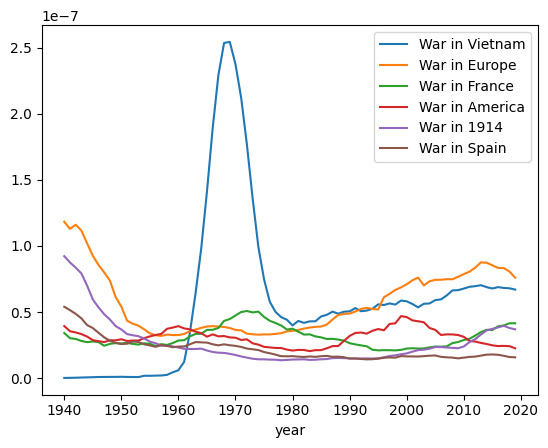

In [33]:
war_in_phrases = ["War in *"]

from google_pygram import GooglePyGram as gpg

# get the pygram
pygram = gpg(
    corpus='English',
    corpus_year=2019,
    start_year=1940,
    end_year=2019,
    smoothing=3,
    case_sensitive=False,
    phrases=war_in_phrases
)

war_ngram = pygram.to_df()
war_ngram = war_ngram.drop(columns=war_in_phrases)
war_ngram.plot(x="year")

war_ngram = war_ngram.drop(columns=["War in the","War in a", "War in which", "War in South"])
war_ngram.plot(x="year")

dissimilarity = np.log(war_ngram['War in France'] / war_ngram['War in Europe']) * war_ngram['War in France']
pd.DataFrame(dissimilarity)